60.単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2022-03-15 01:33:02--  https://docs.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 209.85.146.101, 209.85.146.102, 209.85.146.139, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pbdoj5mracrq3nkcs067aeoti7d7peta/1647307950000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2022-03-15 01:33:02--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pbdoj5mracrq3nkcs067aeoti7d7peta/1647307950000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleus

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

61.単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

62.類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
ranking = model.most_similar('United_States', topn=10)
for rank in ranking:
    print(rank)

('Unites_States', 0.7877248525619507)
('Untied_States', 0.7541370391845703)
('United_Sates', 0.74007248878479)
('U.S.', 0.7310774326324463)
('theUnited_States', 0.6404393911361694)
('America', 0.6178410053253174)
('UnitedStates', 0.6167312264442444)
('Europe', 0.6132988929748535)
('countries', 0.6044804453849792)
('Canada', 0.6019070148468018)


63.加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
ranking = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
for rank in ranking:
    print(rank)

('Greece', 0.6898481249809265)
('Aristeidis_Grigoriadis', 0.5606848001480103)
('Ioannis_Drymonakos', 0.5552908778190613)
('Greeks', 0.545068621635437)
('Ioannis_Christou', 0.5400862693786621)
('Hrysopiyi_Devetzi', 0.5248444676399231)
('Heraklio', 0.5207759737968445)
('Athens_Greece', 0.516880989074707)
('Lithuania', 0.5166866183280945)
('Iraklion', 0.5146791934967041)


64.アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
! wget http://download.tensorflow.org/data/questions-words.txt

--2022-03-15 02:12:15--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.200.128, 2607:f8b0:4001:c16::80
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2022-03-15 02:12:15 (230 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
! head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open("/content/questions-words.txt", "r") as f1, open("questions-words-add.txt", "w") as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':':
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n']))    

In [ ]:
! head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


65.アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open("/content/questions-words-add.txt", "r") as f:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'):
            sem_cnt += 1
            if line[4] == line[5]:
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

sem_acc = sem_cor / sem_cnt
syn_acc = syn_cor / syn_cnt

print(f'意味的アナロジーの正解率：{sem_acc:.3f}')
print(f'文保的アナロジーの正解率：{syn_acc:.3f}')

意味的アナロジーの正解率：0.731
文保的アナロジーの正解率：0.740


66.WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

In [ ]:
! wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
! unzip wordsim353.zip

--2022-03-15 05:24:33--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-03-15 05:24:33--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.03s   

2022-03-15 05:24:33 (675 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
! head -10 'combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open("combined.csv", "r") as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)

for i in range(10):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]
['computer', 'internet', '7.58', 0.40686232]
['plane', 'car', '5.77', 0.3779698]
['train', 'car', '6.31', 0.3402561]
['telephone', 'communication', '7.50', 0.33218452]
['television', 'radio', '6.77', 0.6114971]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数：{correlation:.3f}')

スピアマン相関係数：0.685


67.k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
from sklearn.cluster import KMeans

def take_word_vec(filename):
    countries = set()
    with open(filename) as f:
        for line in f:
            line = line.split()
            if line[0] in ['capital-common-countries', 'capital-world']:
                countries.add(line[2])
            elif line[0] in ['currency', 'gram6-nationality-adjective']:
                countries.add(line[1])
    countries = list(countries)
    return countries
                          
def k_means(k, word_vec):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(word_vec)

    return kmeans

filename = "/content/questions-words-add.txt"
countries = take_word_vec(filename)
word_vec = [model[country] for country in countries]
kmeans = k_means(5, word_vec)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('クラスター', i)
    print(', '.join([countries[k] for k in cluster]))

クラスター 0
Italy, Australia, Spain, Netherlands, Japan, England, Sweden, Portugal, Europe, Greenland, Switzerland, Ireland, Germany, Canada, Finland, Korea, USA, Denmark, France, Belgium, Austria, Liechtenstein, Iceland, Norway
クラスター 1
Madagascar, Zambia, Botswana, Liberia, Ghana, Mali, Mauritania, Gambia, Mozambique, Gabon, Senegal, Angola, Uganda, Zimbabwe, Burundi, Rwanda, Nigeria, Guinea, Malawi, Kenya, Niger, Namibia
クラスター 2
Moldova, Poland, Macedonia, Azerbaijan, Estonia, Slovenia, Turkmenistan, Cyprus, Latvia, Greece, Georgia, Bulgaria, Kazakhstan, Croatia, Hungary, Kyrgyzstan, Malta, Belarus, Slovakia, Romania, Armenia, Albania, Serbia, Uzbekistan, Turkey, Montenegro, Tajikistan, Lithuania, Russia, Ukraine
クラスター 3
Ecuador, Mexico, Suriname, Argentina, Chile, Brazil, Nicaragua, Samoa, Venezuela, Philippines, Dominica, Jamaica, Fiji, Cuba, Belize, Colombia, Honduras, Peru, Uruguay, Guyana, Tuvalu, Bahamas
クラスター 4
Israel, Thailand, India, Iran, Libya, Cambodia, Lebanon, Sudan, Somali

68.Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

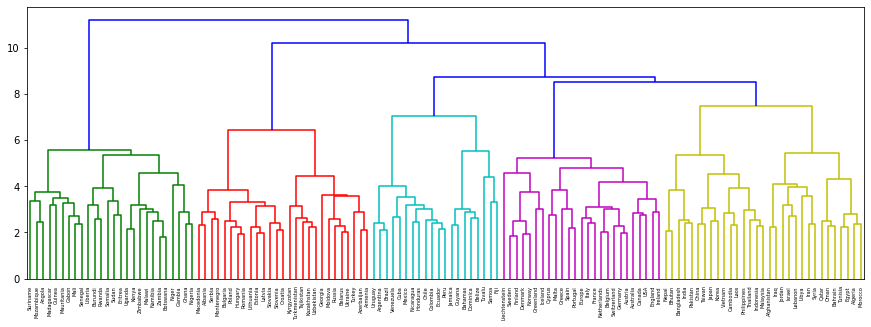

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def Ward(word_vec, words):
    plt.figure(figsize=(15, 5))
    z = linkage(word_vec, method='ward')
    dendrogram(z, labels=words)
    plt.show()

Ward(word_vec, countries)

69.t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [ ]:
! pip install bhtsne

     |████████████████████████████████| 86 kB 2.7 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=215102 sha256=798043e49de1b20a16e7ec641788f25dc0b1cde473e069b4b069271938678fa4
  Stored in directory: /root/.cache/pip/wheels/e4/4c/71/26b7b0736d179d6bfe9d753629955515bf7ba7c1c8a8d98cb4
Successfully built bhtsne


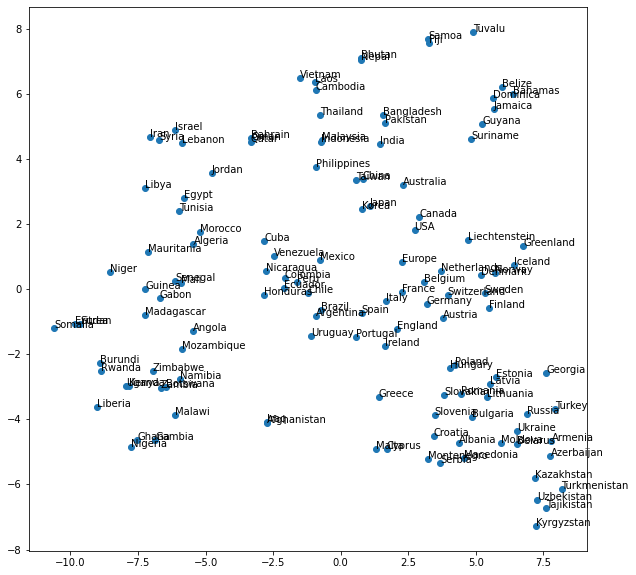

In [ ]:
from scipy.sparse.construct import rand
import bhtsne

def t_SNE(word_vec, words):
    embedded = bhtsne.tsne(np.array(word_vec).astype(np.float64), dimensions=2, rand_seed=123)
    plt.figure(figsize=(10, 10))
    plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
    for (x, y), name in zip(embedded, words):
        plt.annotate(name, (x, y))
    plt.show()

t_SNE(word_vec, countries)